# TMDb Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Deciphering a movie's pre-release success is challenging. Is there a formula, perhaps known to companies like Pixar? In an era where $100 million films can still flop, pre-release success is vital.

In this analysis, we explore the TMDB movie dataset. From Kaggle, the 5000 Movie Dataset holds details on 10,867 films from The Movie Database (TMDb), covering popularity, revenue, budget, cast, and genres. 



### Questions for Analysis
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?
- Which movie had the highest profit?
- What is the distribution of movie runtime in the dataset?

We will start with importing all required libraries to be used in our analysis:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [25]:
# Load our dataset and print out a few lines.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [26]:
# Provide an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [27]:
# Display the rows and columns of the dataset
df.shape

(10866, 21)

In [28]:
# Display summary statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [29]:
# List the column names of the dataset
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

### Remove Duplicates

In [30]:
# Count the duplicates
df.duplicated().sum()

1

In [31]:
# Display the duplicate row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


In [32]:
# Drop the duplicate row
df.drop_duplicates(inplace = True)

# Confirm duplicate row has been dropped
df.duplicated().sum()

0

### Drop Unneeded Columns

In [33]:
# Drop selected columns
df.drop(['imdb_id', 'homepage','tagline', 'keywords', 'overview', 'budget_adj','revenue_adj'],axis =1,inplace = True)

# Displays information about the modified dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


### Handle Null Values

In [34]:
# Count of Null Values in each column 
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [35]:
# Remove null values
df.dropna(how = 'any', inplace = True)

# Confirm null values are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


###  Convert Release Date Column to DateTime Format

In [36]:
# Release_date needs to be converted from string format into datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

### Q1. Which genres are most popular from year to year?

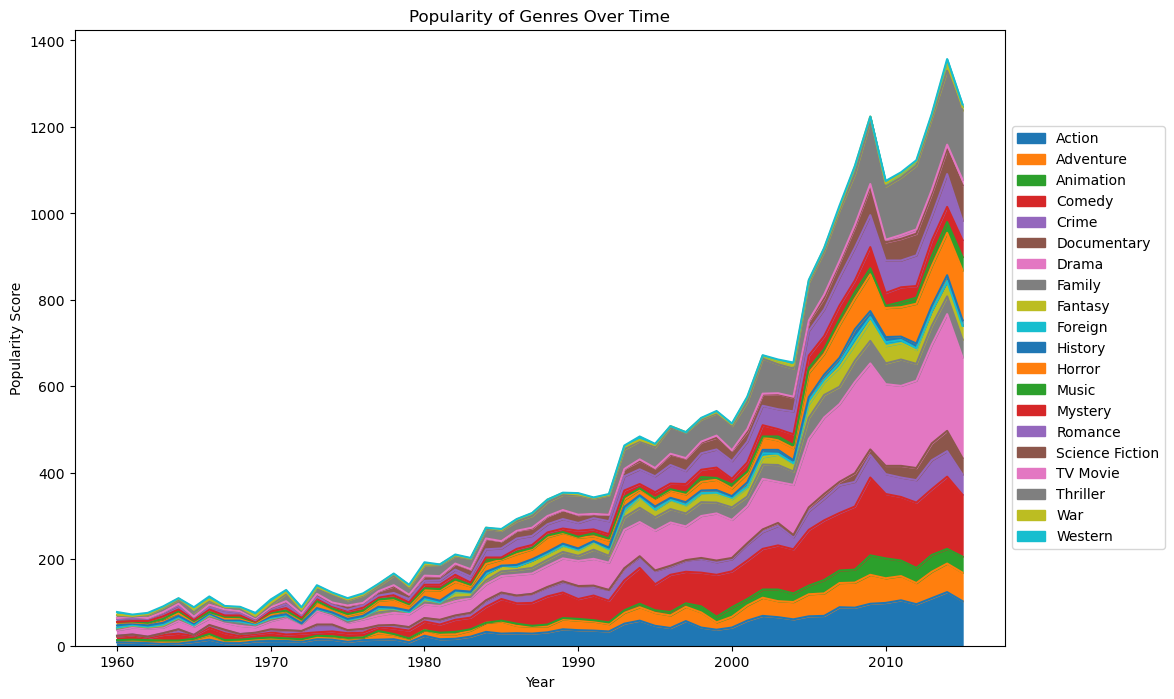

In [37]:
# Split genres column into separate genre columns
genres_df = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres_df], axis=1)

# Group data by year and sum the popularity score for each genre
grouped_df = df.groupby('release_year')[genres_df.columns].sum()

# Plot the data as a stacked area chart
grouped_df.plot.area(figsize=(12, 8), stacked=True)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

> The stacked area chart gives us a visualization of the popularity of each genre over time, with the most popular genres being the ones that take up the most area on the chart each year.

### Q2. What kind of properties are associated with movies that have high revenues?

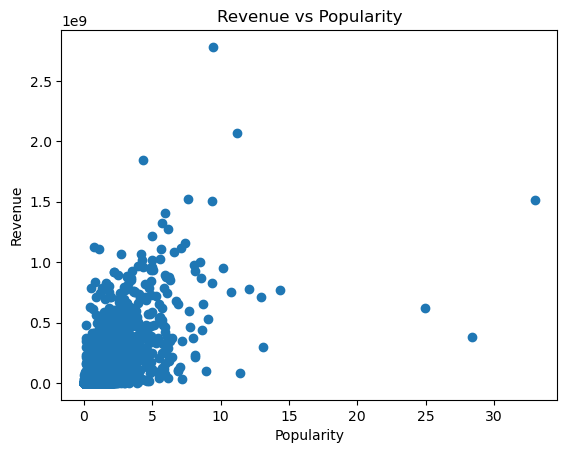

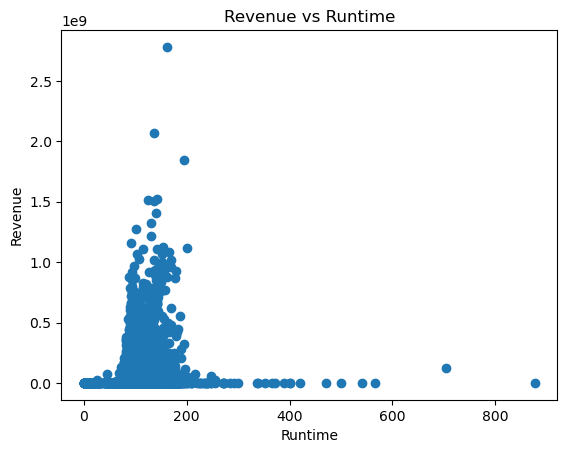

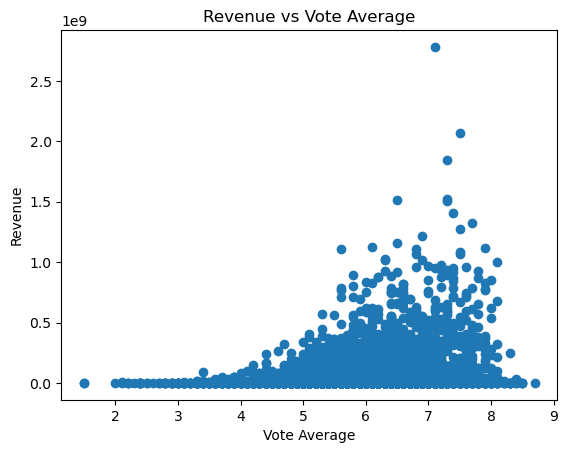

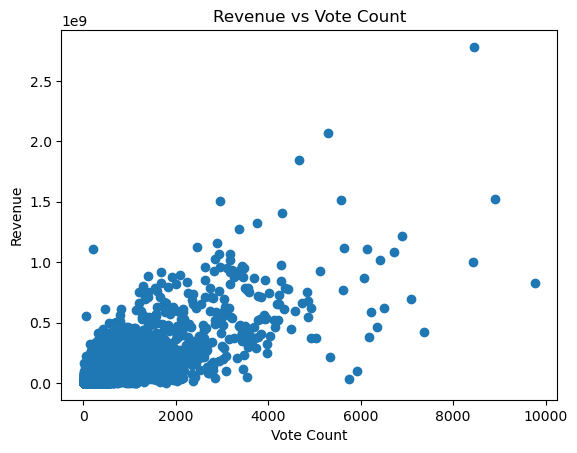

In [38]:
# Create scatter plot of revenue vs popularity
plt.scatter(df['popularity'], df['revenue'])
plt.title('Revenue vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

# Create scatter plot of revenue vs runtime
plt.scatter(df['runtime'], df['revenue'])
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

# Create scatter plot of revenue vs vote_average
plt.scatter(df['vote_average'], df['revenue'])
plt.title('Revenue vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

# Create scatter plot of revenue vs vote_count
plt.scatter(df['vote_count'], df['revenue'])
plt.title('Revenue vs Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

> By creating scatter plots of revenue against different properties of movies, we can get a sense of how these properties are associated with high revenues.

### Q3. Which movie had the highest profit?

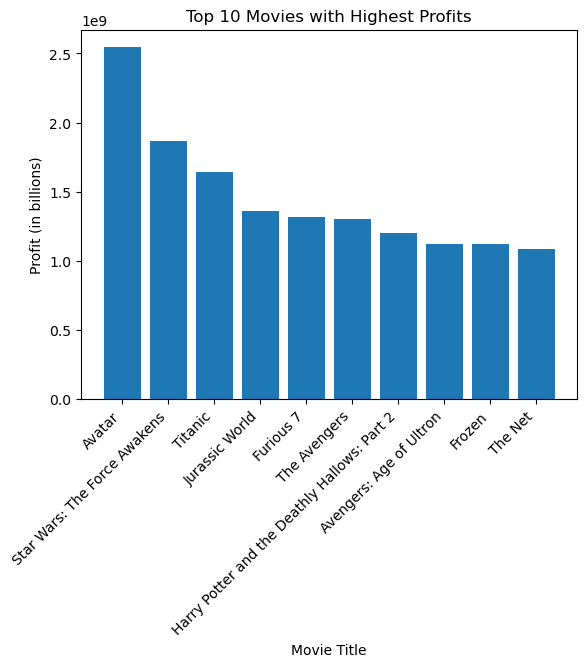

In [41]:
# Define function to calculate profit
def calculate_profit(df):
    df['profit'] = df['revenue'] - df['budget']
    return df

# Call the calculate_profit function
df = calculate_profit(df)

# Sort the dataframe by profit in descending order
sorted_df = df.sort_values(by=['profit'], ascending=False)

# Select the top 10 movies with the highest profits
top_10 = sorted_df.head(10)

# Create a bar graph of the top 10 movies with the highest profits
plt.bar(top_10['original_title'], top_10['profit'])
plt.title('Top 10 Movies with Highest Profits')
plt.xlabel('Movie Title')
plt.ylabel('Profit (in billions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

> The bar chart above visualizes the profit for the top 10 movies. We can see that Avatar generated the most profit with 2.5 billion USD.

### Q4. What is the distribution of movie runtime in the dataset?

Mean runtime: 102.92662709783053
Median runtime: 100.0
Standard deviation of runtime: 27.87600533280363


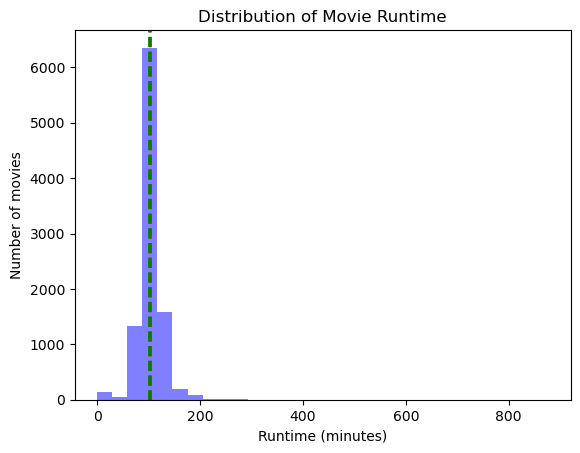

In [40]:
# Select the 'runtime' column and drop any missing values
runtime = df['runtime'].dropna()

# Calculate basic statistics of the runtime distribution
mean = np.mean(runtime)
median = np.median(runtime)
std = np.std(runtime)

# Print the basic statistics
print("Mean runtime:", mean)
print("Median runtime:", median)
print("Standard deviation of runtime:", std)

# Create a histogram of the runtime distribution
plt.hist(runtime, bins=30, color='blue', alpha=0.5)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.axvline(median, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of movies')
plt.title('Distribution of Movie Runtime')
plt.show()

<a id='conclusions'></a>
## Conclusions

### Q1. Which genres are most popular from year to year?
> There is shifting trends in popular movie genres over time. Drama and comedy dominated in the 1960s and 1970s, followed by a surge in action and thriller genres in the 1980s and 1990s. Notably, adventure and science fiction genres gained prominence in the 2000s and 2010s, indicating a dynamic evolution of audience preferences throughout different decades.

### Q2. What kind of properties are associated with movies that have high revenues?
> Higher movie revenues are associated with factors like increased budgets, popularity, longer runtimes, higher vote averages, and larger vote counts. This suggests that well-funded movies, appreciated by audiences, tend to be more successful at the box office.

### Q3. Which movie had the highest profit?
> The movie with the highest profit in the dataset is Avatar, followed by Star Wars: The Force Awakens and Titanic.

### Q4. What is the distribution of movie runtime in the dataset?
>  Most movies are around 100 minutes long. But there are some movies that are super long, lasting more than 150 minutes. 

## Limitations Within Findings

1. Dataset only covers up to 2015; total popularity focus may overlook audience perceptions and genre consumption nuances.
2. Correlation doesn't mean causation; other factors may influence a movie's box office success.
3. Profit alone doesn't measure movie success; consider critical acclaim, audience reception, and cultural impact.
4. Only analyzes runtime distribution, without exploring variations by genre or year, potentially missing insights.